In [ ]:
import kagglehub
path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print("Path to dataset files:", path)

100%|██████████| 19.0M/19.0M [00:00<00:00, 108MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166


In [ ]:
import pandas as pd
import os
files_in_path = os.listdir(path)
print("Files in the dataset directory:", files_in_path)
csv_file = None
for f in files_in_path:
    if f.endswith('.csv'):
        csv_file = f
        break

if csv_file:
    full_file_path = os.path.join(path, csv_file)
    print(f"Identified data file: {full_file_path}")
    df = pd.read_csv(full_file_path)
    print("Dataset loaded successfully. Displaying the first 5 rows:")
    print(df.head())
else:
    print("No CSV file found in the directory. Please check the dataset contents.")

Files in the dataset directory: ['day_wise.csv', 'country_wise_latest.csv', 'worldometer_data.csv', 'usa_county_wise.csv', 'full_grouped.csv', 'covid_19_clean_complete.csv']
Identified data file: /root/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166/day_wise.csv
Dataset loaded successfully. Displaying the first 5 rows:
         Date  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0  2020-01-22        555      17         28     510          0           0   
1  2020-01-23        654      18         30     606         99           1   
2  2020-01-24        941      26         36     879        287           8   
3  2020-01-25       1434      42         39    1353        493          16   
4  2020-01-26       2118      56         52    2010        684          14   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0              0                3.06                   5.05   
1              2                2.75                   4.59   
2

In [ ]:
print("DataFrame Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
print("\n'Date' column converted to datetime.")

# Clean column names
df.columns = df.columns.str.replace(' ', '_').str.lower()
print("\nColumn names cleaned. New column names:")
print(df.columns)

print("\nFirst 5 rows of the preprocessed DataFrame:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB

Missing values per column:
Date                      0
Confirmed         

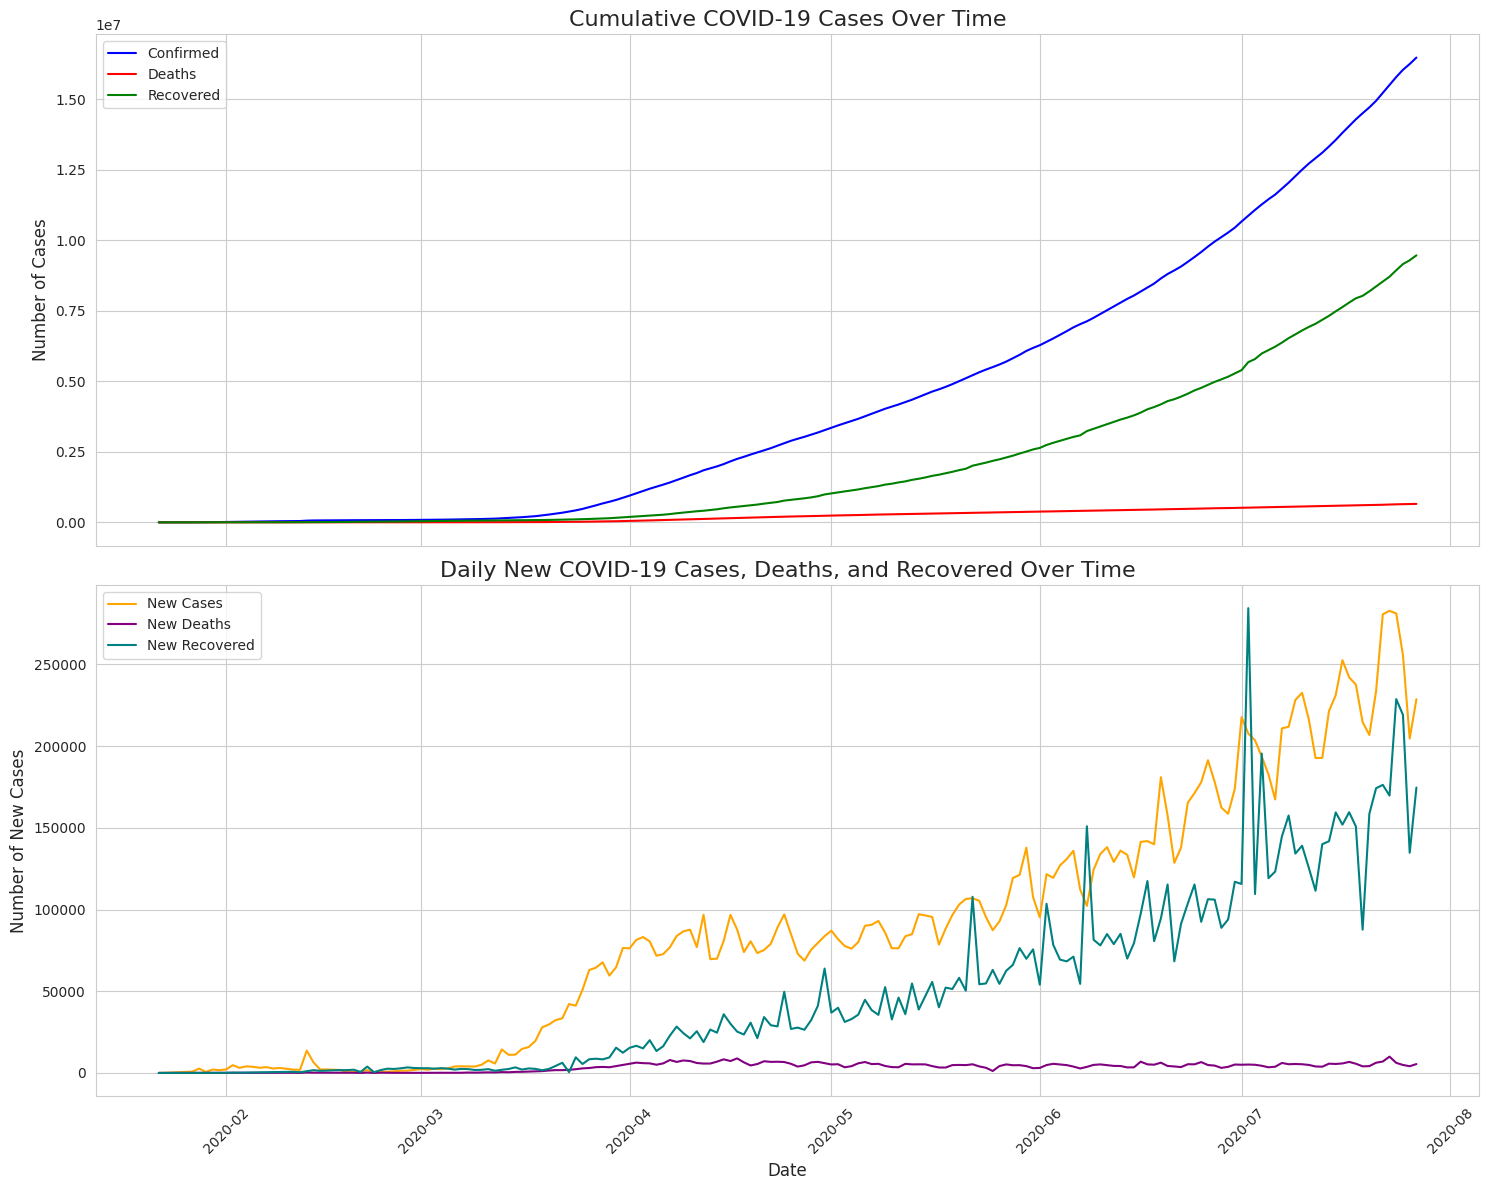

Generated time-series plots for cumulative and new COVID-19 cases, deaths, and recoveries.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with two subplots to display cumulative and new cases trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12), sharex=True)

# Plot 1: Cumulative Confirmed, Deaths, and Recovered Cases over time
sns.lineplot(ax=axes[0], x='date', y='confirmed', data=df, label='Confirmed', color='blue')
sns.lineplot(ax=axes[0], x='date', y='deaths', data=df, label='Deaths', color='red')
sns.lineplot(ax=axes[0], x='date', y='recovered', data=df, label='Recovered', color='green')

axes[0].set_title('Cumulative COVID-19 Cases Over Time', fontsize=16)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot 2: New Cases, New Deaths, and New Recovered over time
sns.lineplot(ax=axes[1], x='date', y='new_cases', data=df, label='New Cases', color='orange')
sns.lineplot(ax=axes[1], x='date', y='new_deaths', data=df, label='New Deaths', color='purple')
sns.lineplot(ax=axes[1], x='date', y='new_recovered', data=df, label='New Recovered', color='teal')

axes[1].set_title('Daily New COVID-19 Cases, Deaths, and Recovered Over Time', fontsize=16)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Number of New Cases', fontsize=12)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("Generated time-series plots for cumulative and new COVID-19 cases, deaths, and recoveries.")

## Summary:

### Data Analysis Key Findings

*   **Dataset Loading and Initial Inspection**: The `day_wise.csv` file, containing 188 entries and 12 columns, was successfully loaded. It included daily data on 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', and various rates per 100 cases/recovered.
*   **Data Quality and Preprocessing**: The dataset was found to have no missing values across all columns. The 'Date' column was correctly converted to datetime format, and all column names were cleaned by replacing spaces with underscores and converting them to lowercase (e.g., 'New cases' became 'new\_cases').
*   **Cumulative Trends**:
    *   **Confirmed Cases** showed a clear exponential growth, with the curve continuously steepening throughout the observed period.
    *   **Deaths** increased at a significantly slower rate compared to confirmed and recovered cases, appearing much flatter.
    *   **Recovered Cases** also exhibited a strong upward, exponential trend, closely mirroring confirmed cases but with a noticeable lag.
    *   The gap between cumulative confirmed and recovered cases widened over time, while the gap between confirmed cases and deaths remained relatively small.
*   **Daily Trends**:
    *   **Daily New Cases** displayed a fluctuating but generally increasing trend, with significant surges observed, particularly a peak exceeding 250,000 new cases per day around late July/early August, indicating waves of accelerated spread.
    *   **Daily New Deaths** remained relatively low compared to new cases and new recoveries, showing a slight increase over time but lacking the sharp peaks seen in new cases.
    *   **Daily New Recoveries** showed a highly variable pattern, with spikes and dips, generally following the pattern of new cases with a delay.
*   **Overall Pandemic Pattern**: The pandemic exhibited rapid growth, characterized by steepening cumulative curves. Daily trends indicated that this growth occurred in surges or waves, without a clear sign of significant deceleration or control within the observed timeframe.

### Insights or Next Steps

*   The contrasting trends between rapidly increasing cumulative confirmed/recovered cases and the relatively flat cumulative death curve, along with the less sharp peaks in daily new deaths, suggest potential improvements in patient care or a shift in the demographic of affected populations, leading to lower mortality rates despite widespread infection.
*   Further analysis could involve investigating the specific events or policy changes that might have contributed to the significant surges in daily new cases and recoveries observed around late July/early August, and correlating these with the corresponding lag in new deaths or recoveries.
